In [5]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [21]:
# prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise =20, random_state=4)


X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(y.shape)
y = y.view(y.shape[0], 1)
print(y.shape)

torch.Size([100])
torch.Size([100, 1])


epoch: 10, loss = 4042.4546
epoch: 20, loss = 2848.3916
epoch: 30, loss = 2034.6733
epoch: 40, loss = 1480.0269
epoch: 50, loss = 1101.8873
epoch: 60, loss = 844.0297
epoch: 70, loss = 668.1578
epoch: 80, loss = 548.1796
epoch: 90, loss = 466.3155
epoch: 100, loss = 410.4469


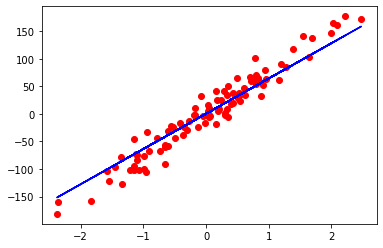

In [22]:
n_samples, n_features = X.shape

# model
# linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y, y_predicted)
    
    # backward pass and loss
    loss.backward()
    optimizer.step()
    
    # zero grad before new step
    optimizer.zero_grad()
    
    if (epoch+1)%10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        
# plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()
    